In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier




In [2]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/Arun078/Jan-project-ml/master/bank.csv')

## View the first and last 5 rows of the dataset.

In [3]:
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Understand the shape of the dataset.

In [4]:
df_bank.shape

(10000, 14)



*   The dataset has 10000 rows and 14 columns




# Check the data types of the columns for the dataset.

In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB




*   There are no null values in the data.
*   3 columns are of object type rest all are numerical.



## Summary of the dataset.

In [6]:
df_bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Check number of unique columns

In [7]:
df_bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64



*   Here RowNumber,CustomerId are unique columns





# EDA

In [8]:
df_bank.drop(columns=['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [9]:
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df_bank.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df_bank.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
num_cols = list(df_bank.select_dtypes(['int64','float64']).columns)
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

# Observations on each numerical column

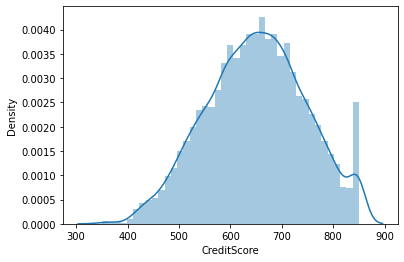

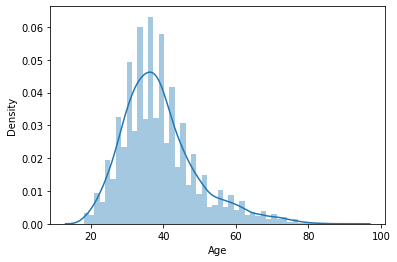

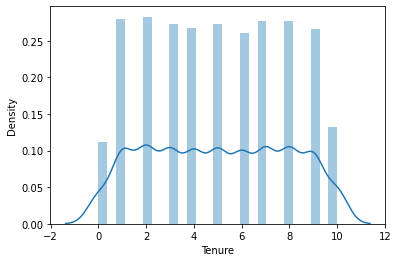

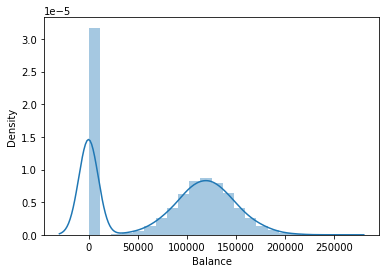

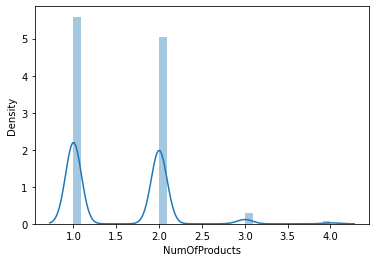

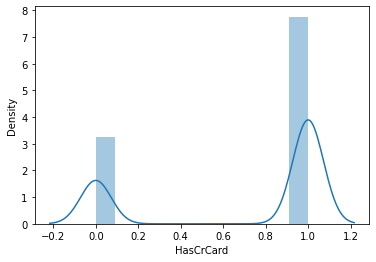

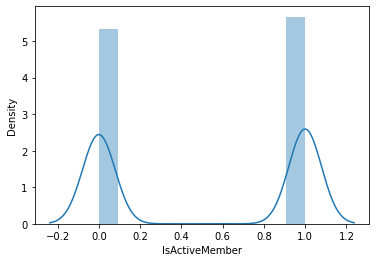

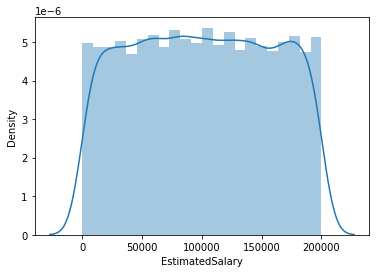

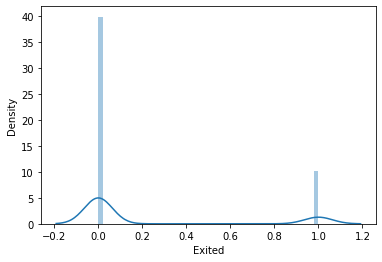

In [13]:
for i in num_cols:
  sns.distplot(df_bank[i])
  plt.show()

### HasCrCard, IsActiveMember, NumOfProducts numerical columns change to object columns for for observation

In [14]:
df_bank.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [15]:
def Has_Cr_Card(x):
  if x==1:
    return 'Yes'
  else:
    return 'No'
df_bank['HasCrCard']=df_bank['HasCrCard'].apply(Has_Cr_Card)    
df_bank['HasCrCard'].value_counts()

Yes    7055
No     2945
Name: HasCrCard, dtype: int64

In [16]:
df_bank.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [17]:
def Is_Active_Member(x):
  if x==1:
    return 'Yes'
  else:
    return 'No'
df_bank['IsActiveMember'] = df_bank['IsActiveMember'].apply(Is_Active_Member)
df_bank['IsActiveMember'].value_counts()

Yes    5151
No     4849
Name: IsActiveMember, dtype: int64

In [18]:
df_bank.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [19]:
def Num_Of_Products(x):
  if x==1:
    return 'One'
  elif x==2:
    return 'Two'
  elif x==3:
    return 'Three'
  else:
    return 'Four'
df_bank['NumOfProducts']=df_bank['NumOfProducts'].apply(Num_Of_Products)
df_bank['NumOfProducts'].value_counts()

One      5084
Two      4590
Three     266
Four       60
Name: NumOfProducts, dtype: int64

In [20]:
df_bank.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts       object
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
cat_cols = list(df_bank.select_dtypes(['object']).columns)
cat_cols

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Observation of objective columns

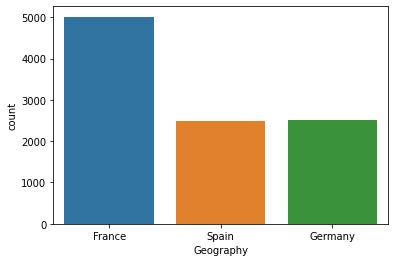

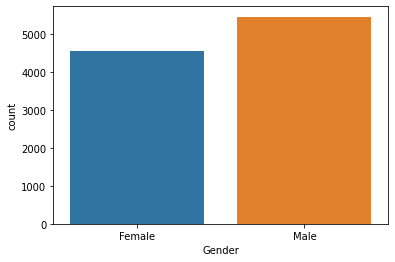

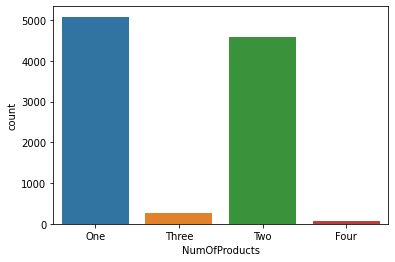

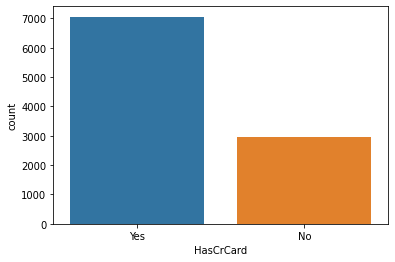

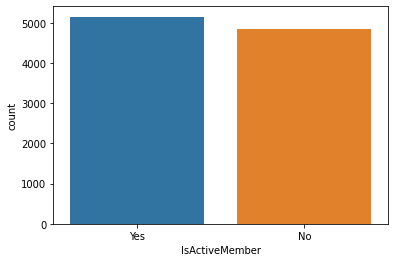

In [22]:
for i in cat_cols:
  sns.countplot(df_bank[i])
  plt.show()

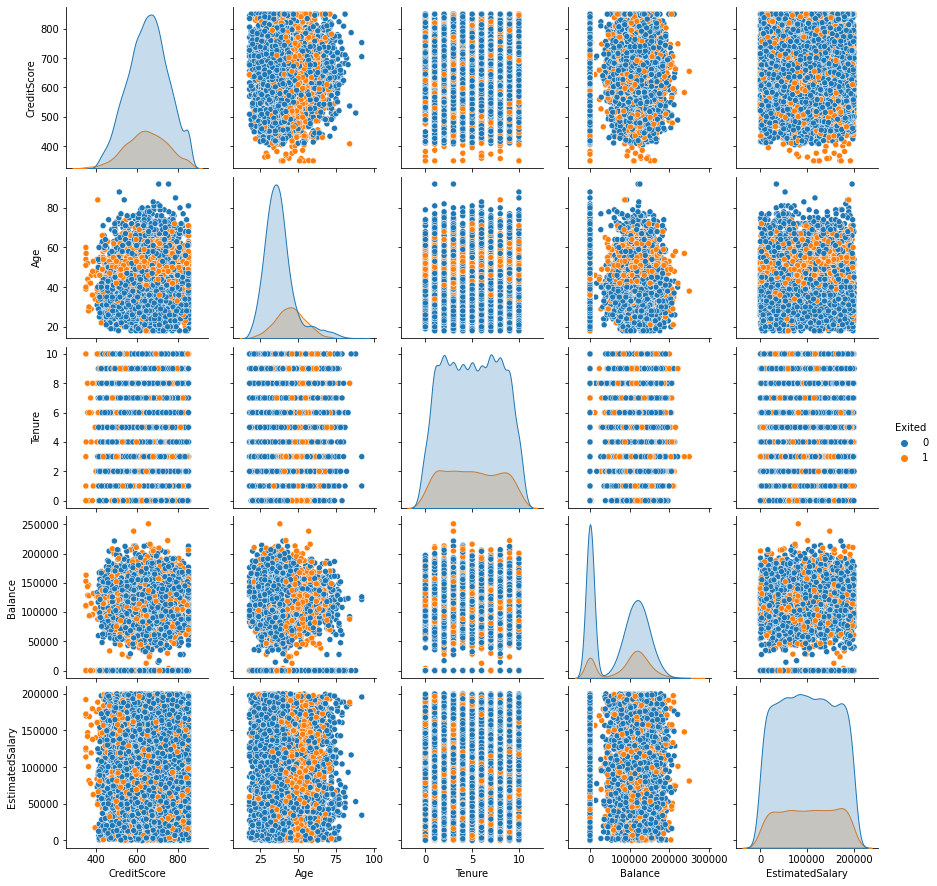

In [23]:
sns.pairplot(df_bank, hue = 'Exited')
plt.show()

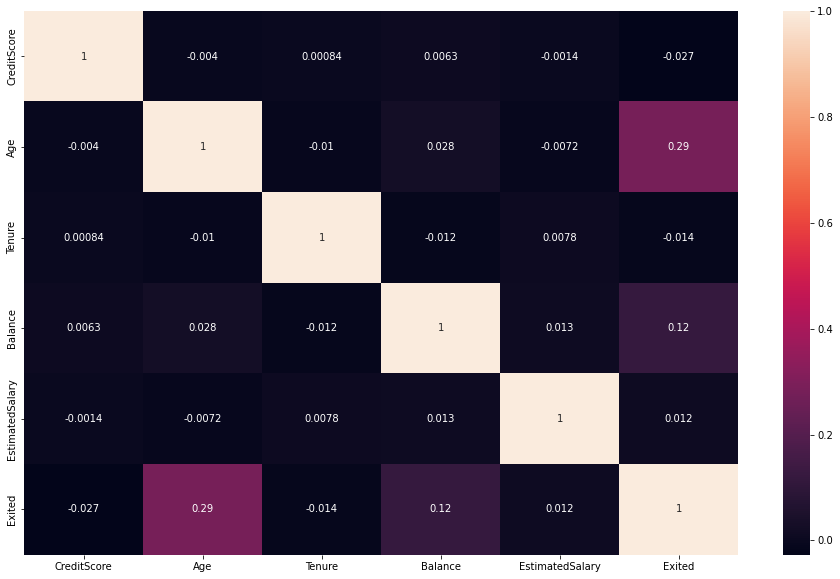

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(data = df_bank.corr(), annot=True )
plt.show()

## Check Outliers

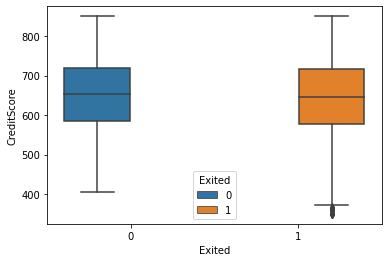

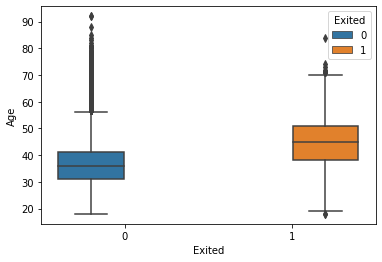

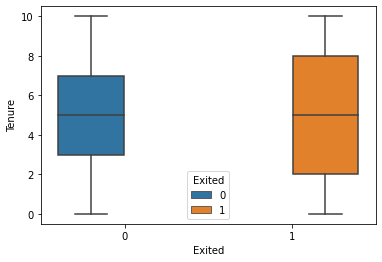

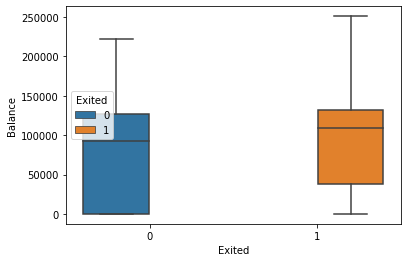

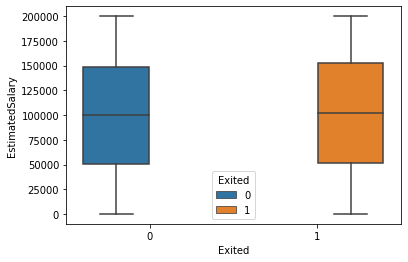

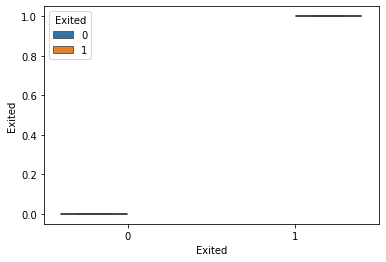

In [25]:
for i in df_bank.select_dtypes(exclude='object').columns:
  sns.boxplot(data=df_bank, x='Exited' ,y=i ,hue='Exited')
  plt.show()

## Separate the independent column (y) and dependent columns (X) from the dataset. 

In [26]:
X=df_bank.drop(['Exited'],axis = 1)
y=df_bank[['Exited']]

In [27]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,One,Yes,Yes,101348.88
1,608,Spain,Female,41,1,83807.86,One,No,Yes,112542.58
2,502,France,Female,42,8,159660.80,Three,Yes,No,113931.57
3,699,France,Female,39,1,0.00,Two,No,No,93826.63
4,850,Spain,Female,43,2,125510.82,One,Yes,Yes,79084.10


In [28]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [29]:
y.value_counts(normalize=True)

Exited
0         0.7963
1         0.2037
dtype: float64

In [30]:
X.shape

(10000, 10)

In [31]:
y.shape

(10000, 1)

### Splitting data into training and test set:

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.25, random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2500, 10)
(7500, 10)
(2500, 1)
(7500, 1)


In [33]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8090,697,France,Female,48,1,0.00,Two,Yes,Yes,87400.53
8347,807,Spain,Female,28,7,165969.26,Three,Yes,No,156122.13
7462,610,France,Male,40,9,0.00,One,Yes,Yes,149602.54
6886,733,Germany,Male,45,2,113939.36,Two,Yes,No,3218.71
4733,710,France,Female,31,1,0.00,Two,Yes,No,20081.30


# Encoding categorical varaibles

In [34]:
from sklearn import preprocessing
X_train = pd.get_dummies(X_train, columns=["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"],drop_first=True)

# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [36]:
from sklearn import metrics

# Machine Learning Models



**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [37]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [38]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### LogisticRegression

In [39]:
lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

*  K-Folds cross-validator provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.




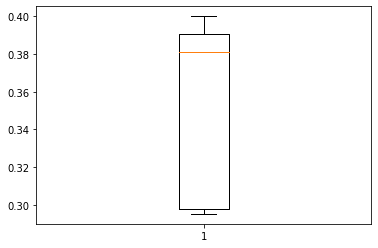

In [40]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr_model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Accuracy on training set :  0.838
Accuracy on test set :  0.8388
Recall on training set :  0.37595419847328243
Recall on test set :  0.356906807666887
Precision on training set :  0.7163636363636363
Precision on test set :  0.6958762886597938


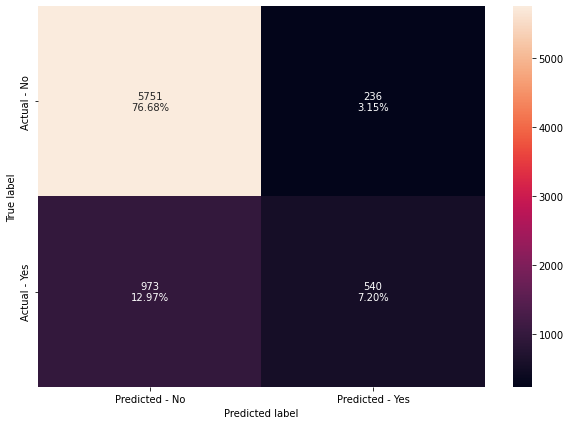

In [41]:
#Calculating different metrics
scores_LR = get_metrics_score(lr_model,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr_model,y_test)

# Bagging and Boosting

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

*   Stratified K-Folds cross-validator provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.





In [42]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1,)),
            ]
        ),
    )
)


models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging_classifier", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 45.98717948717949
Bagging: 40.065934065934066
RF: 42.74175824175824
GBM: 45.21794871794872
XGB: 44.835164835164825


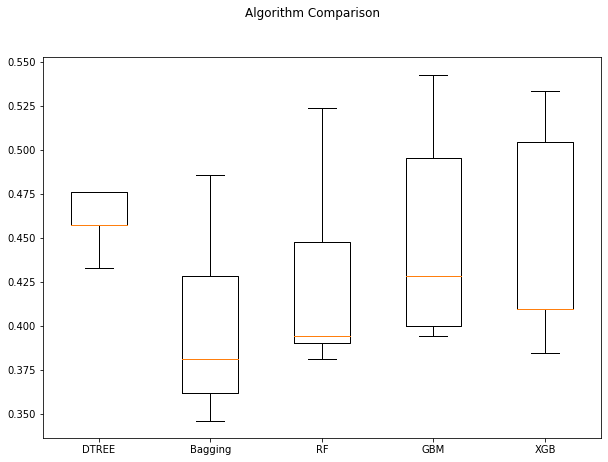

In [43]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Hyperparameter Tuning

### Hyperparameter tuning Decision Tree

### GridSearchCV

In [44]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__max_leaf_nodes': 5, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 1} 
Score: 0.5687728937728938


In [45]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=2,
        max_leaf_nodes=5,
        random_state=1,
        min_impurity_decrease=0.0001,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                                        min_impurity_decrease=0.0001,
                                        random_state=1))])

Accuracy on training set :  0.8084
Accuracy on test set :  0.8208
Recall on training set :  0.5610687022900763
Recall on test set :  0.5723727693324521
Precision on training set :  0.5414364640883977
Precision on test set :  0.5540626999360204


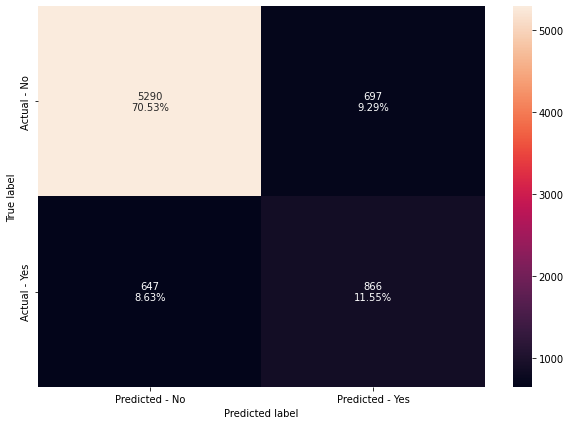

In [46]:
# Calculating different metrics
get_metrics_score(dtree_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

### Hyperparameter tuning BaggingClassifier

### GridSearchCV

In [47]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 50} 
Score: 0.42179487179487174


In [48]:
# Creating new pipeline with best parameters
bagg_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.9,
        max_samples=0.9,
        random_state=1,
        n_estimators=50,
    ),
)

# Fit the model on training data
bagg_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.9,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9968
Accuracy on test set :  0.8552
Recall on training set :  0.9866412213740458
Recall on test set :  0.426305353602115
Precision on training set :  0.9980694980694981
Precision on test set :  0.7473928157589803


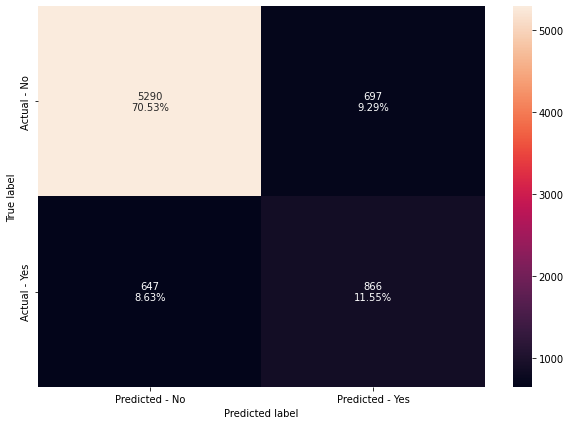

In [49]:
# Calculating different metrics
get_metrics_score(bagg_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

### Hyperparameter tuning Random Forest

### GridSearchCV

In [51]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_samples': 0.5000000000000001, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 250} 
Score: 0.40849816849816845


In [52]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=250,
        max_features='sqrt',
        random_state=1,
        max_samples=0.5000000000000001,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt',
                                        max_samples=0.5000000000000001,
                                        n_estimators=250, random_state=1))])

Accuracy on training set :  0.9596
Accuracy on test set :  0.8624
Recall on training set :  0.8091603053435115
Recall on test set :  0.43225380039656314
Precision on training set :  0.9976470588235294
Precision on test set :  0.7908101571946796


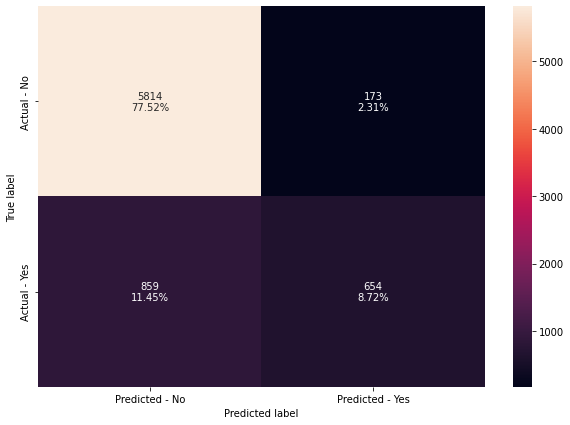

In [53]:
# Calculating different metrics
get_metrics_score(rf_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

### Hyperparameter tuning GradientBoosting

### GridSearchCV

In [54]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.5,0.7,1],
    "gradientboostingclassifier__max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__max_features': 1, 'gradientboostingclassifier__n_estimators': 125, 'gradientboostingclassifier__subsample': 0.5} 
Score: 0.5094322344322345


In [64]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        learning_rate=1,
        max_features=1,
        n_estimators=125,
        subsample=0.5,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=1, max_features=1,
                                            n_estimators=125, random_state=1,
                                            subsample=0.5))])

Accuracy on training set :  0.8412
Accuracy on test set :  0.7802666666666667
Recall on training set :  0.6068702290076335
Recall on test set :  0.47918043621943157
Precision on training set :  0.6247544204322201
Precision on test set :  0.45741324921135645


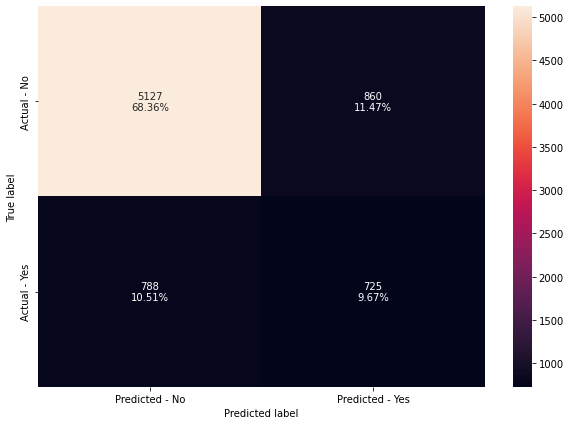

In [65]:
# Calculating different metrics
get_metrics_score(gbc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

### Hyperparameter tuning XGBoost

#### GridSearchCV


In [57]:
#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__subsample': 0.9} with CV score=0.4695421245421246:


In [66]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=250,
        subsample=0.9,
        learning_rate=0.2,
        gamma=0,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(learning_rate=0.2, n_estimators=250,
                               random_state=1, subsample=0.9))])

Accuracy on training set :  0.9488
Accuracy on test set :  0.8521333333333333
Recall on training set :  0.7919847328244275
Recall on test set :  0.48050231328486454
Precision on training set :  0.956221198156682
Precision on test set :  0.6923809523809524


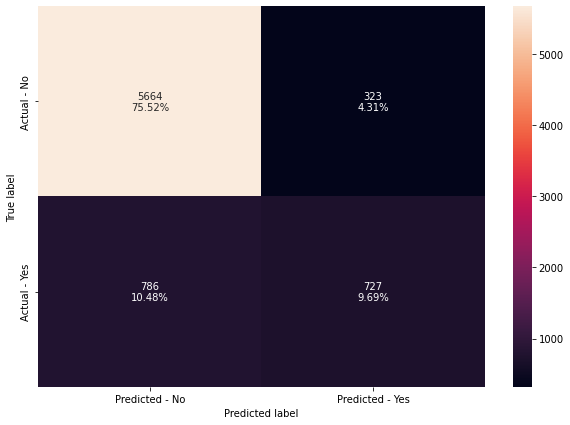

In [67]:
# Calculating different metrics
get_metrics_score(xgb_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

In [68]:
# defining list of model
models = [lr_model]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [69]:
# defining list of models
models = [dtree_tuned1,bagg_tuned1,rf_tuned1,gbc_tuned1,xgb_tuned1]


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [70]:
comparison_frame = {
        "Model": [
            "Logistic Regression",
            "Decision Tree with GridSearchCV",
            "Bagging Classifier with GridSearchCV",
            "Random Forest with GridSearchCV",
            "GradientBoost with GridSearchCV",
            "XGBoost with GridSearchCV",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
   }
comparison = pd.DataFrame.from_dict(comparison_frame, orient='index')
comparison

# Sorting models in decreasing order of test recall


,0,1,2,3,4,5
Model,Logistic Regression,Decision Tree with GridSearchCV,Bagging Classifier with GridSearchCV,Random Forest with GridSearchCV,GradientBoost with GridSearchCV,XGBoost with GridSearchCV
Train_Accuracy,0.838,0.8084,0.9968,0.9596,0.8412,0.9488
Test_Accuracy,0.8388,0.8208,0.8552,0.8624,0.780267,0.852133
Train_Recall,0.375954,0.561069,0.986641,0.80916,0.60687,0.791985
Test_Recall,0.356907,0.572373,0.426305,0.432254,0.47918,0.480502
Train_Precision,0.716364,0.541436,0.998069,0.997647,0.624754,0.956221
Test_Precision,0.695876,0.554063,0.747393,0.79081,0.457413,0.692381


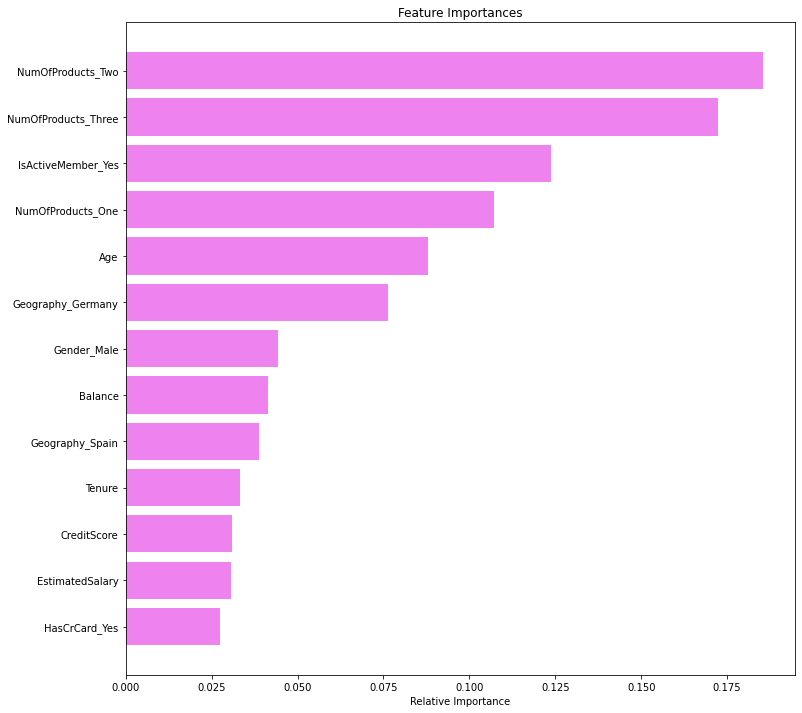

In [71]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()